In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib

In [2]:
current_directory = os.getcwd()
print(current_directory)
train = pd.read_csv('data/train.csv')

test = pd.read_csv('data/test.csv')

/home/data_sci/kaggle/Titanic


In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


|             |                  |                            |   |   |   |   |   |   |   |
|-------------|------------------|----------------------------|---|---|---|---|---|---|---|
|             |                  |                            |   |   |   |   |   |   |   |
| Variable    | Definition       | Key                        |   |   |   |   |   |   |   |
| PassengerId | 乘客ID編號           |                            |   |   |   |   |   |   |   |
| survival    | 是否倖存             | 0 = No, 1 = Yes            |   |   |   |   |   |   |   |
| pclass      | 船票等級             | 1 = 1st, 2 = 2nd, 3 = 3rd  |   |   |   |   |   |   |   |
| sex         | 性別               |                            |   |   |   |   |   |   |   |
| Age         | 年齡               |                            |   |   |   |   |   |   |   |
| sibsp       | 在船上同為兄弟姐妹或配偶的數目  |                            |   |   |   |   |   |   |   |
| parch       | 在船上同為家族的父母及小孩的數目 |                            |   |   |   |   |   |   |   |


In [5]:
train.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [6]:
train.shape

(891, 12)

In [7]:
X_train = pd.concat([train, test])

print(X_train.shape)

(1309, 12)


## 資料概觀

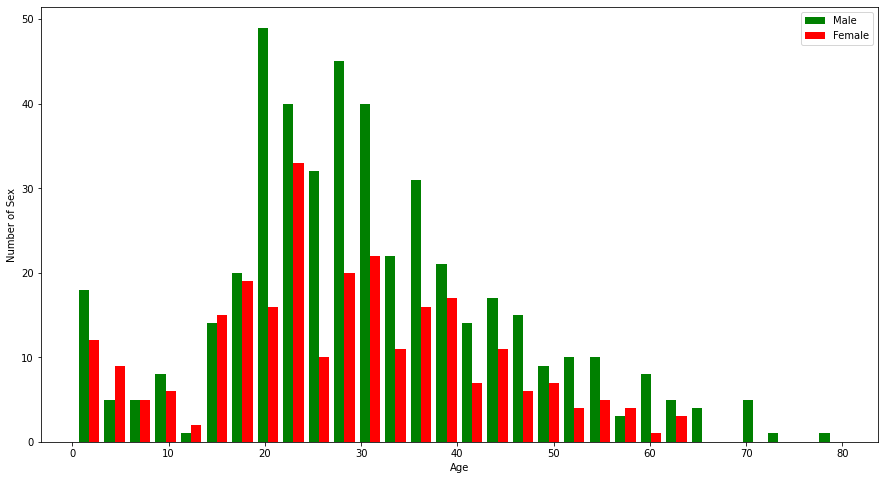

In [8]:
figure = plt.figure(figsize=(15,8))

plt.hist([train[train['Sex']=='male']['Age'], train[train['Sex']=='female']['Age']], stacked=False, color = ['g','r'], bins = 30,label = ['Male','Female'])

plt.xlabel('Age')

plt.ylabel('Number of Sex')

plt.legend()

In [9]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


船票等級與存活的關係：

Pclass欄位指的是船票等級。以下看出Pclass的等級愈高（1>2>3）則存活機率愈大，看來愈富有的人坐上救生艇的機率更高。

<AxesSubplot:>

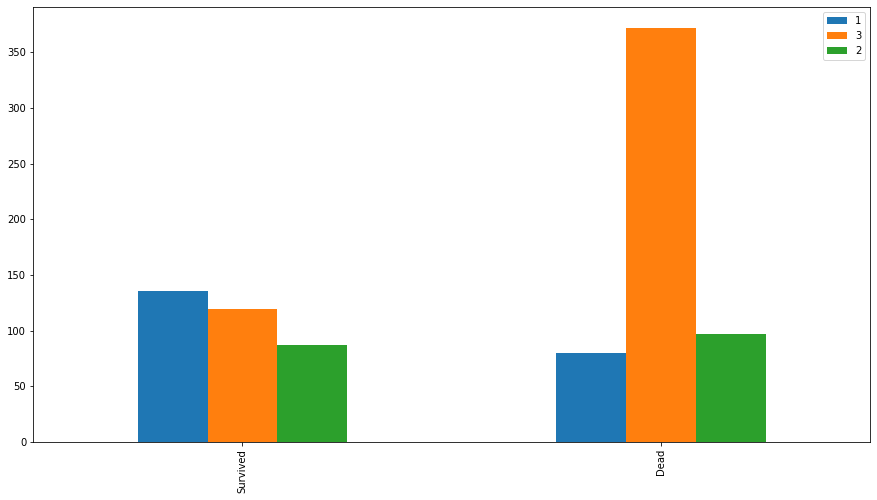

In [10]:
survived_pclass = train[train['Survived']==1]['Pclass'].value_counts()

dead_pclass = train[train['Survived']==0]['Pclass'].value_counts()

df = pd.DataFrame([survived_pclass,dead_pclass])

df.index = ['Survived','Dead']

df.plot(kind='bar',stacked=False, figsize=(15,8))

不同年齡層與倖存的關係：

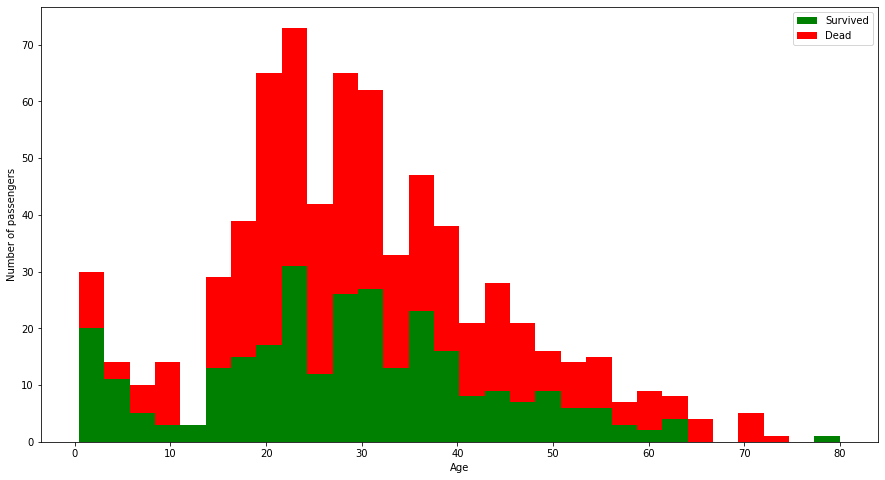

In [11]:
figure = plt.figure(figsize=(15,8))

plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], stacked=True, color = ['g','r'],

         bins = 30,label = ['Survived','Dead'])

plt.xlabel('Age')

plt.ylabel('Number of passengers')

plt.legend()

不同票價與存活的關係

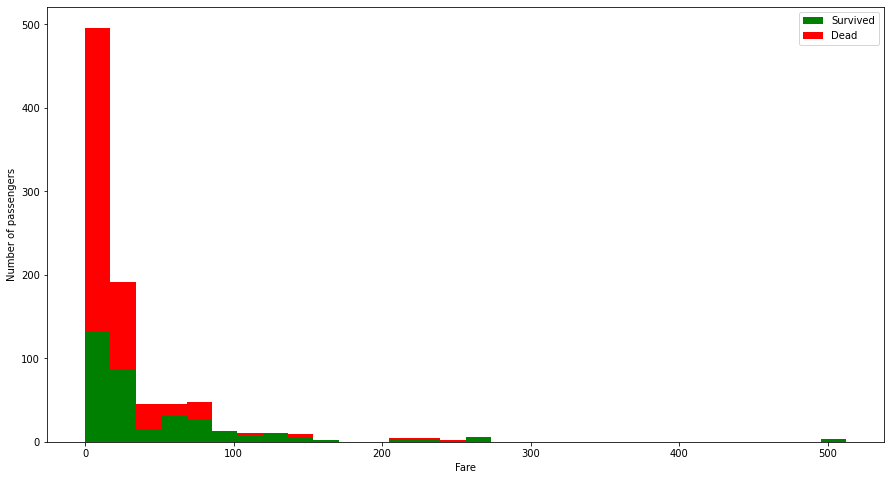

In [12]:
figure = plt.figure(figsize=(15,8))

plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']], stacked=True, color = ['g','r'],

         bins = 30,label = ['Survived','Dead'])

plt.xlabel('Fare')

plt.ylabel('Number of passengers')

plt.legend()

票價、年齡與存活三者之間的關係：

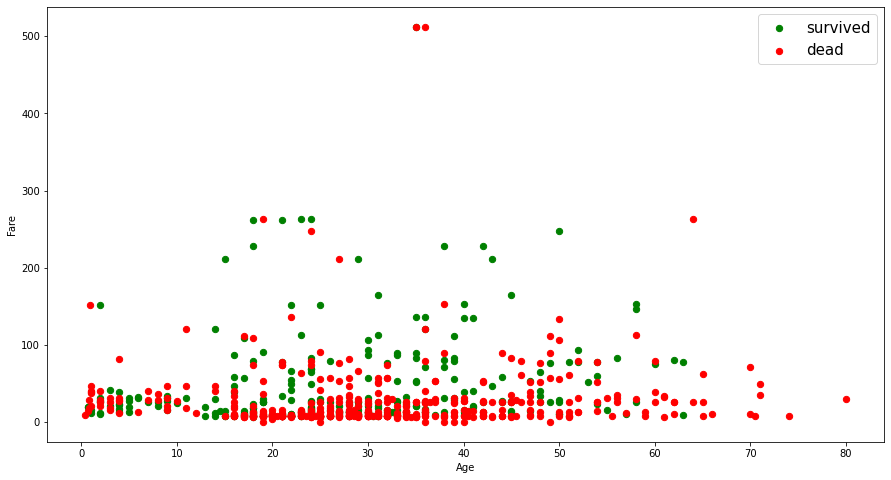

In [13]:
plt.figure(figsize=(15,8))

ax = plt.subplot()

ax.scatter(train[train['Sex']=='female']['Age'],train[train['Sex']=='female']['Fare'],c='green',s=40)

ax.scatter(train[train['Sex']=='male']['Age'],train[train['Sex']=='male']['Fare'],c='red',s=40)

ax.set_xlabel('Age')

ax.set_ylabel('Fare')

ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

艙房號碼與存活的關係：


In [14]:
X_train['Cabin'].fillna('-', inplace=True)

cabinList = ['C', 'E', 'G', 'D', 'A', 'B', 'F']

for Cabin in cabinList:

    mask =  (X_train['Cabin'].str.contains(Cabin))

    X_train.loc[mask,'Cabin'] = Cabin

In [15]:
total_Cabin_p1 = X_train[X_train['Pclass']==1]['Cabin'].value_counts()

total_Cabin_p2 = X_train[X_train['Pclass']==2]['Cabin'].value_counts()

total_Cabin_p3 = X_train[X_train['Pclass']==3]['Cabin'].value_counts()

print(total_Cabin_p1)

print(total_Cabin_p2)

print(total_Cabin_p3)

C    94
-    67
B    65
D    40
E    34
A    22
T     1
Name: Cabin, dtype: int64
-    254
F     13
D      6
E      4
Name: Cabin, dtype: int64
-    693
G      9
E      6
F      1
Name: Cabin, dtype: int64


## 特徵工程與訓練

In [16]:
Y_label = train.Survived
Y_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

合併SibSp及Parch欄位：
依據之前的資料分析，SibSp及Parch欄位分別為直屬與旁系親屬人數欄位，其實此兩個欄位可加總合併成一個欄位稱為Family，然後刪除SibSp及Parch。

In [17]:
X_train['Family'] = X_train['SibSp'] + X_train['Parch']



In [18]:
X_train = X_train.drop(columns='SibSp')

X_train = X_train.drop(columns='Parch')



In [19]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,-,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,-,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,-,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,-,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,C,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,-,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,359309,8.0500,-,S,0


檢視各數值欄位的缺值情況：
Train與Test兩個dataset總計應有891+418=1309筆資料，不過透過X_train.info()檢視後，發現Age, Fare等三個欄位有缺值情況：

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        1309 non-null   object 
 9   Embarked     1307 non-null   object 
 10  Family       1309 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### 處理缺值



Age欄位
有263位乘客缺少Age欄位資料，直接把有缺值的乘客資料刪除是最簡便的方式，但由於年齡這個feature影響倖存率甚鉅，因此如果刪去這些記錄相當可惜，我們得想辦法把這些缺失的Age資料補救回來。輸入下方指令查看所有Age欄位為NaN的乘客。

In [21]:
X_train[X_train['Age'].isnull()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
5,6,0.0,3,"Moran, Mr. James",male,NaN,330877,8.4583,-,Q,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,244373,13.0000,-,S,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,2649,7.2250,-,C,0
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,2631,7.2250,-,C,0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,330959,7.8792,-,Q,0
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,334915,7.7208,-,Q,0
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,365237,7.7500,-,Q,0
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,-,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,359309,8.0500,-,S,0


In [22]:
mask =  (X_train['Age'].isnull()) & ( (X_train['Name'].str.contains('Ms.')) | (X_train['Name'].str.contains('Miss.')) )

mask2 = ( (X_train['Name'].str.contains('Ms.')) | (X_train['Name'].str.contains('Miss.')))

X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train.loc[mask2, 'Age'].median())

In [23]:
mask =  (X_train['Age'].isnull()) & ( (X_train['Name'].str.contains('Mr.')) | (X_train['Name'].str.contains('Sir.')) | (X_train['Name'].str.contains('Major')))

mask2 =  ( (X_train['Name'].str.contains('Mr.')) | (X_train['Name'].str.contains('Sir.')) | (X_train['Name'].str.contains('Major')))

X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train.loc[mask2,'Age'].median())

In [24]:
X_train[X_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,2661,15.2458,-,C,2
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,CA. 2343,69.5500,-,S,10
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,4133,25.4667,-,S,4
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,2661,15.2458,-,C,2
766,767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,112379,39.6000,-,C,0
244,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,W./C. 6607,23.4500,-,S,3
339,1231,NaN,3,"Betros, Master. Seman",male,NaN,2622,7.2292,-,C,0
344,1236,NaN,3,"van Billiard, Master. James William",male,NaN,A/5. 851,14.5000,-,S,2
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,2668,22.3583,-,C,2


這九位乘客的姓名絕大部份都帶有Master.，有趣的是他們的年齡都很小。我們一樣採用中位數作為其年齡。

In [25]:
mask =  (X_train['Age'].isnull()) & ( X_train['Name'].str.contains('Master.') )

X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train[X_train['Name'].str.contains('Master.')]['Age'].median())

In [26]:
X_train[X_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
766,767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,112379,39.6,-,C,0


In [27]:
mask =  (X_train['Age'].isnull()) & ( X_train['Name'].str.contains('Dr\.') )

X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train[X_train['Name'].str.contains('Dr\.')]['Age'].median())

In [28]:
X_train[X_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family


In [29]:
X_train[X_train['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,3701,NaN,-,S,0


In [30]:
def fill_Fare():
    X_train['Fare'].fillna(X_train['Fare'].median(), inplace=True)

fill_Fare()

In [31]:
X_train[X_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,113572,80.0,B,NaN,0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,113572,80.0,B,NaN,0


記得前面針對Embarked的分析嗎？從Cherbourg港口上岸的乘客比起其它港口,有較大的比例為P1等級的船票，剛好這兩位乘客的船票等級（Pclass）都是1，因此，我們就直接假設她們的上岸港口為Cherbourg。

In [32]:
X_train['Embarked'].fillna('C', inplace=True)

In [33]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.448946,33.281086,0.883881
std,378.020061,0.486592,0.837836,13.137353,51.741500,1.583639
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,30.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,35.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,512.329200,10.000000


In [34]:
X_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,1309,1309
unique,1307,2,929,9,3
top,"Connolly, Miss. Kate",male,CA. 2343,-,S
freq,2,843,11,1014,914


分類Ticket欄位的值

直覺上船票編號看起來和最終是否存活似乎沒有關係，因此大部份的人會考慮把該欄位捨棄不看，但我覺得編號為字母開頭的船票有其特別意義，與單純數字的Ticket可進行分類，因此，我把Ticket欄位進行如下的處理：

若Ticket編號為字母加上編號，則取其字母部份。
若該Ticket編號只有數字，則改為空字串。


In [35]:
def fill_Ticket():

    global X_train

    X_train['Ticket'] = X_train['Ticket'].str.extract('([a-zA-Z]*)', expand=False).str.upper()

fill_Ticket()

In [36]:
X_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,1309,1309
unique,1307,2,21,9,3
top,"Connolly, Miss. Kate",male,,-,S
freq,2,843,957,1014,914


In [37]:
print(X_train['Ticket'].unique())

['A' 'PC' 'STON' '' 'PP' 'C' 'SC' 'S' 'CA' 'SO' 'W' 'SOTON' 'FA' 'LINE'
 'F' 'SW' 'SCO' 'P' 'WE' 'AQ' 'LP']


Name欄位的萃取

Name（姓名）欄位可以抓出種種與身份相關的資訊，例如："Sir.", “Major", “Dr.", “Master."…等等，因此，我們執行下述程式，將Name欄位中的稱謂單獨取出新增為Title欄位，若欄位中無任何稱謂，則依其年齡來判斷，給予一個合適的稱謂。

In [38]:
def fill_Title():

    global X_train

   

    for typeName in ['Ms.', 'Miss.', 'Mr.', 'Sir.', 'Major', 'Dr.', 'Master.', 'Mme.']:

        mask = (X_train['Name'].str.contains(typeName))

        replaceTitle = typeName

        if(typeName=='Mme.'):

           replaceTitle = 'Ms.'

        X_train.loc[mask,'Title'] = replaceTitle

   

    mask = X_train['Title'].isnull() & (X_train['Age']<14) & (X_train['Sex']=='male')

    X_train.loc[mask, 'Title'] = 'Master.'

   

    mask = X_train['Title'].isnull() & (X_train['Age']>13) & (X_train['Sex']=='male')

    X_train.loc[mask, 'Title'] = 'Mr.'

    mask = X_train['Title'].isnull() & (X_train['Sex']=='female')

    X_train.loc[mask, 'Title'] = 'Miss.'

       

fill_Title()



In [39]:
X_train = X_train.drop(columns='Name')

In [40]:
X_train.describe(include=['O'])

,Sex,Ticket,Cabin,Embarked,Title
count,1309,1309,1309,1309,1309
unique,2,21,9,3,7
top,male,,-,S,Mr.
freq,843,957,1014,914,965


### One-Hot Encoding：
最後須將所有即非數值Categories型態欄位進行One-Hot Encoding，才能送給機器進行學習。這些屬於類別型態的欄位有：Sex、Pclass、Ticket、Cabin、Embarked、Title。

In [41]:
def oneHotEncode():

    global X_train

   

    X_train.drop('PassengerId', inplace=True, axis=1)    

    X_train['Sex'] = X_train['Sex'].map({'male':1,'female':0})    

   

    X_train['Embarked'] = X_train['Embarked'].astype('category').cat.codes

    X_train['Pclass'] = X_train['Pclass'].astype('category').cat.codes

    X_train['Title'] = X_train['Title'].astype('category').cat.codes

    X_train['Cabin'] = X_train['Cabin'].astype('category').cat.codes

    X_train['Ticket'] = X_train['Ticket'].astype('category').cat.codes

   

oneHotEncode()

### 建構模型與訓練
在開始訓練之前，記得將被合併到Train dataset的Test dataset再搬出來。

In [42]:
X_train = X_train.drop(columns='Survived', axis=1)

X_test = X_train.iloc[891:]

X_train = X_train.head(891)

X_train.shape, Y_label.shape, X_test.shape

((891, 9), (891,), (418, 9))